In [22]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
import mne 

from pydmd import DMD, BOPDMD
from pydmd.plotter import plot_eigs, plot_summary
from pydmd.preprocessing import hankel_preprocessing 

In [2]:
raw = mne.io.read_raw_eeglab('sep_uwgr_prepro.set', preload=False)
events, event_id = mne.events_from_annotations(raw)

tmin = -0.05
tmax = 0.22

epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=None, preload=False)

Reading /data/u_kamm_software/EEG data analysis/eeg_llm/sep_uwgr_prepro.fdt


/tmp/ipykernel_615682/2354897670.py:1: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab('sep_uwgr_prepro.set', preload=False)


Used Annotations descriptions: ['1']
Not setting metadata
6038 matching events found
No baseline correction applied
0 projection items activated


In [3]:
data = epochs.get_data()
avg_data = epochs.average().data

Loading data for 6038 events and 554 original time points ...
0 bad epochs dropped


In [5]:
X1 = avg_data[:, :-1]
X2 = avg_data[:, 1:]

In [12]:
r = 4
U, S, Vh = np.linalg.svd(X1, full_matrices='False')
V = Vh.conj().T
U, S, V = U[:, :r], S[:r], V[:, :r]

In [13]:
A_tilde = (U.conj().T @ X2) @ (V @ np.linalg.inv(np.diag(S)))
D, W = np.linalg.eig(A_tilde)

In [15]:
Phi = X2 @ V @ np.linalg.inv(np.diag(S)) @ W @ np.linalg.inv(np.diag(D)) 

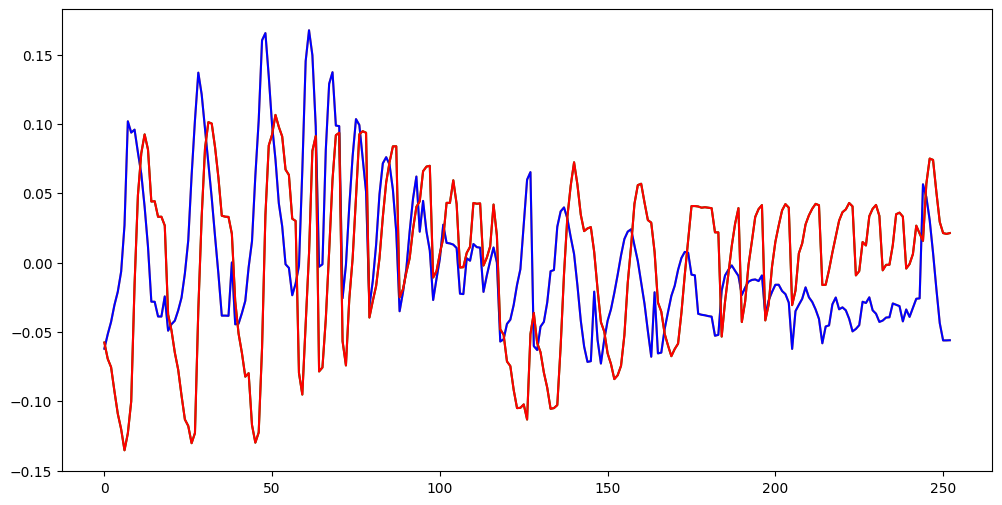

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(Phi.real[:, 0], color='orange')
plt.plot(Phi.real[:, 1], color='blue')
plt.plot(Phi.real[:, 2], color='green')
plt.plot(Phi.real[:, 3], color='red')
plt.show()

/data/u_kamm_software/EEG data analysis/eeg_llm/.venv/lib/python3.9/site-packages/pydmd/snapshots.py:73: UserWarning: Input data condition number 610271.7762437551. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


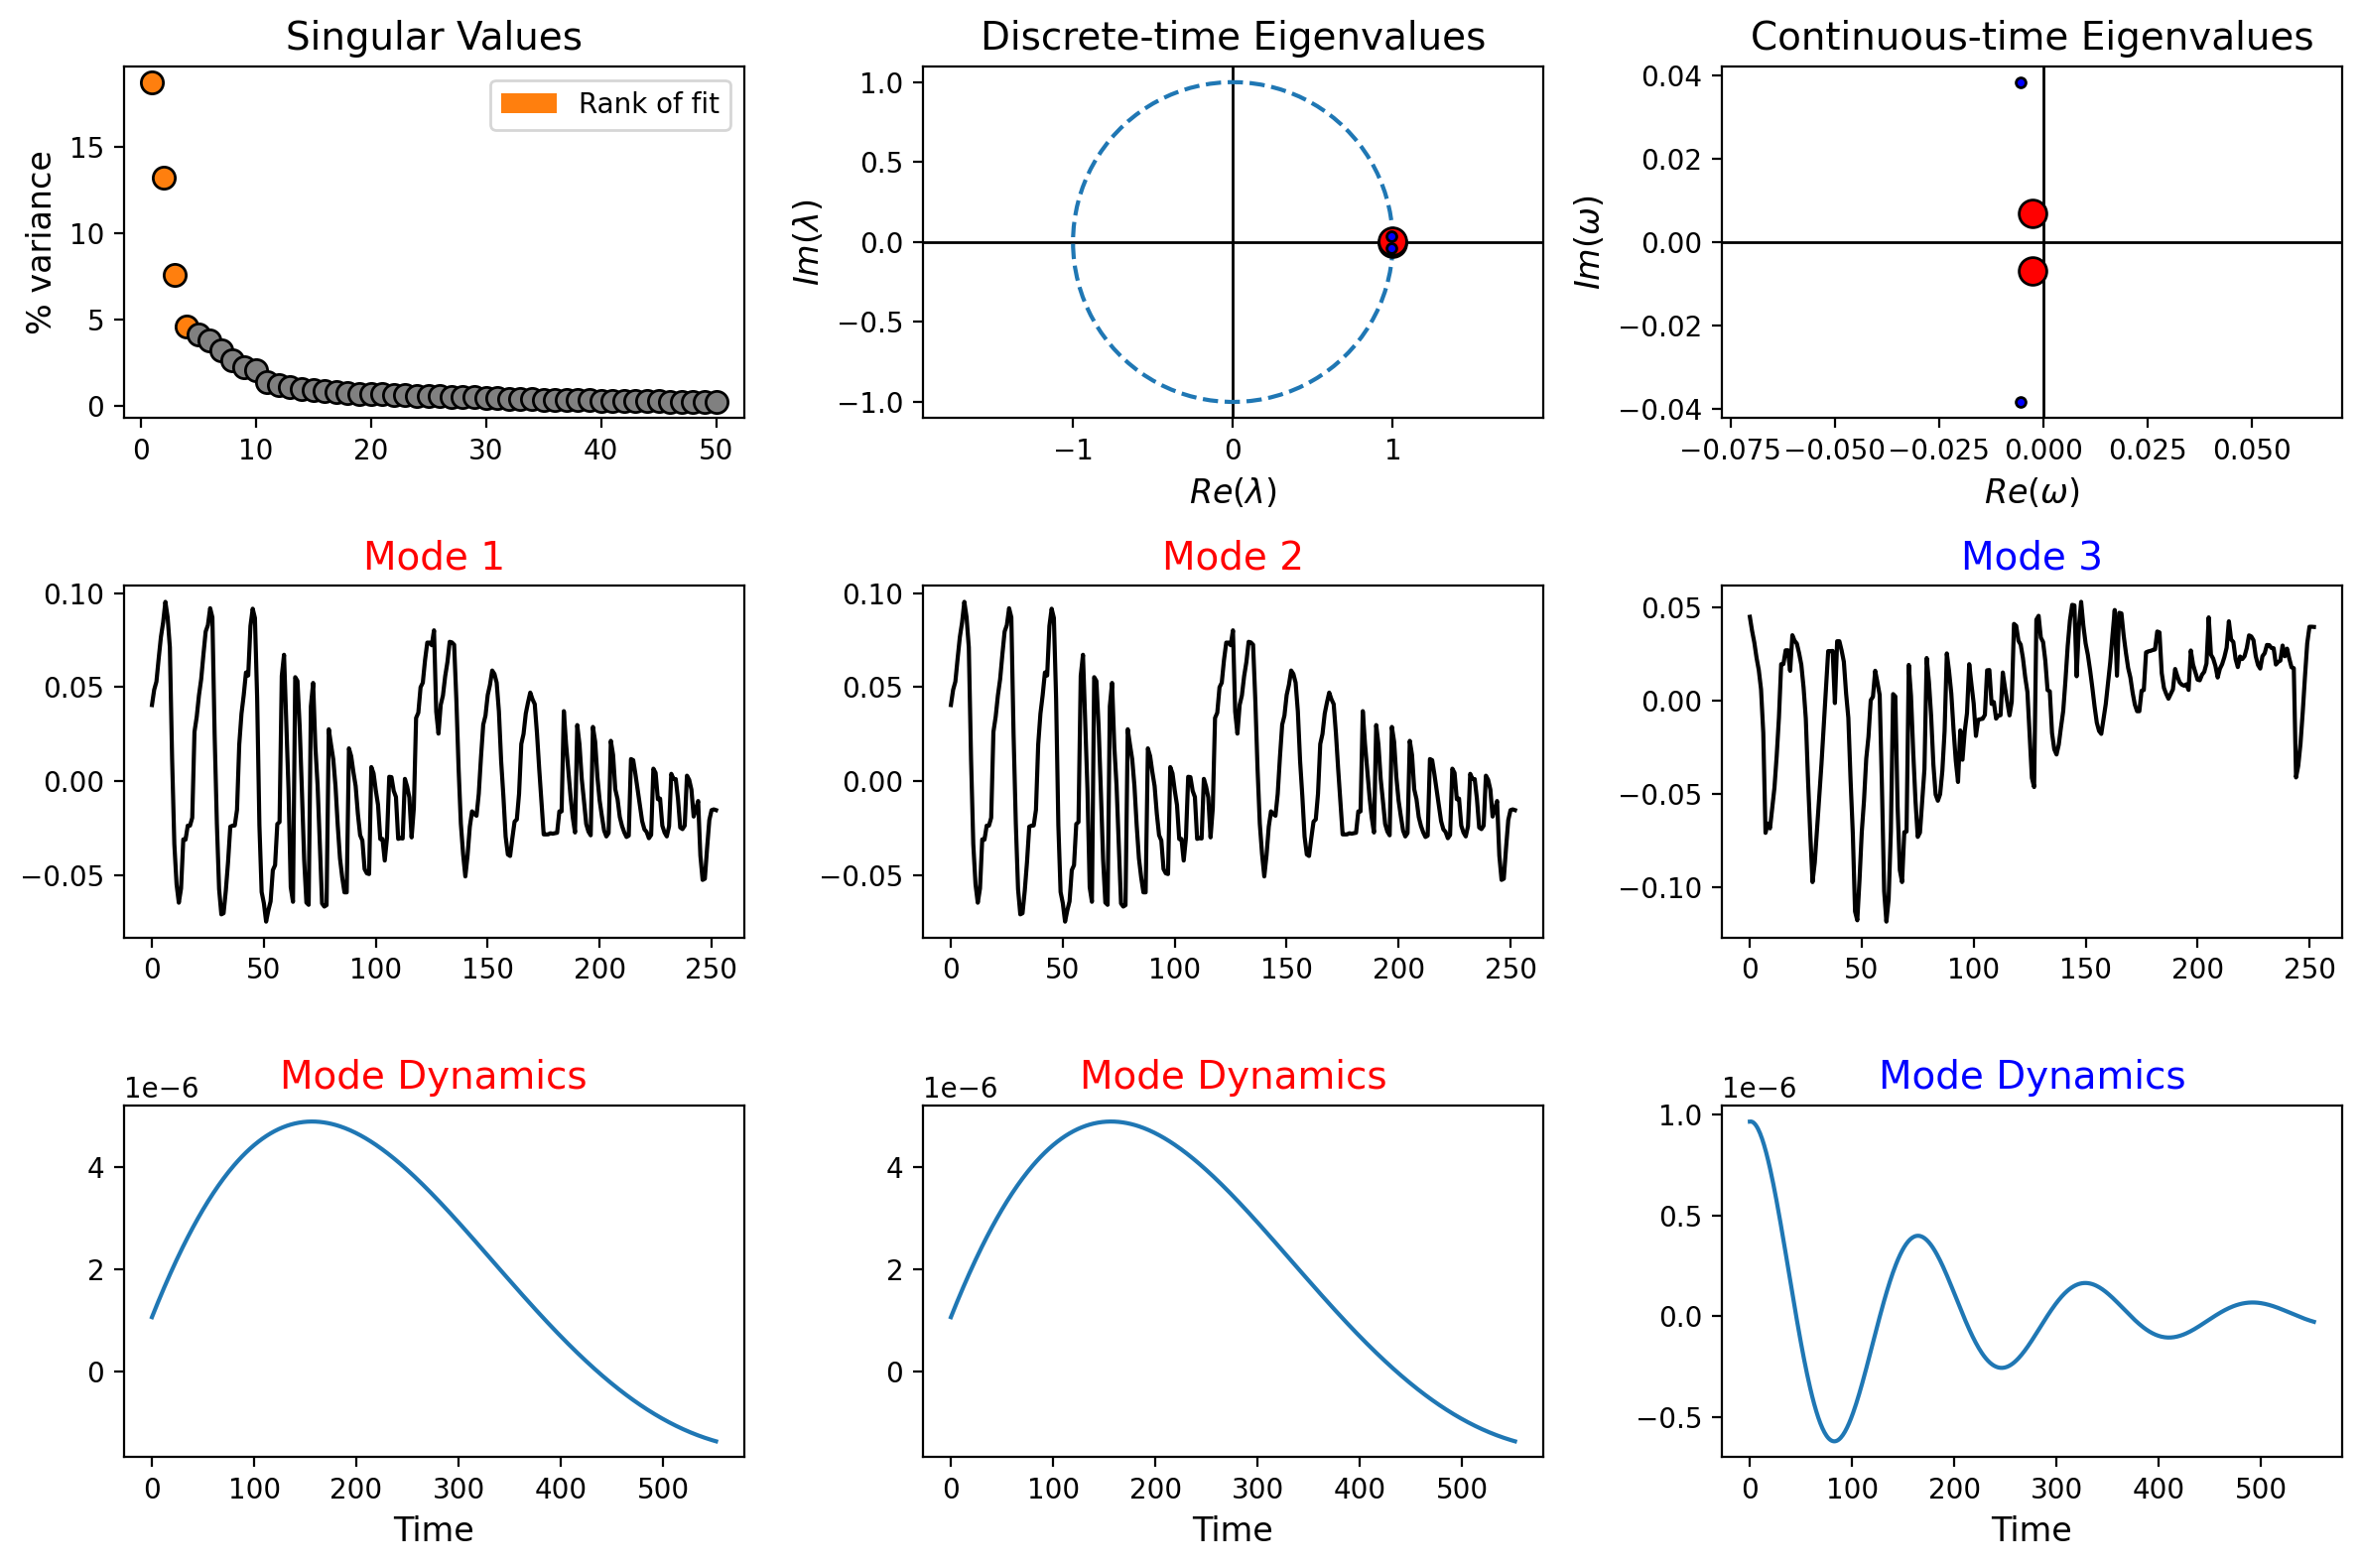

In [21]:
d = 2 
dmd = DMD(svd_rank=4)
delay_dmd = hankel_preprocessing(dmd, d=d)
delay_dmd.fit(avg_data)
plot_summary(delay_dmd, d=d)

In [40]:
delay_t.shape

(553,)

/data/u_kamm_software/EEG data analysis/eeg_llm/.venv/lib/python3.9/site-packages/pydmd/snapshots.py:73: UserWarning: Input data condition number 121081.84222734117. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(
/data/u_kamm_software/EEG data analysis/eeg_llm/.venv/lib/python3.9/site-packages/pydmd/bopdmd.py:751: UserWarning: Initial trial of Optimized DMD failed to converge. Consider re-adjusting your variable projection parameters with the varpro_opts_dict and consider setting verbose=True.
  warnings.warn(msg)


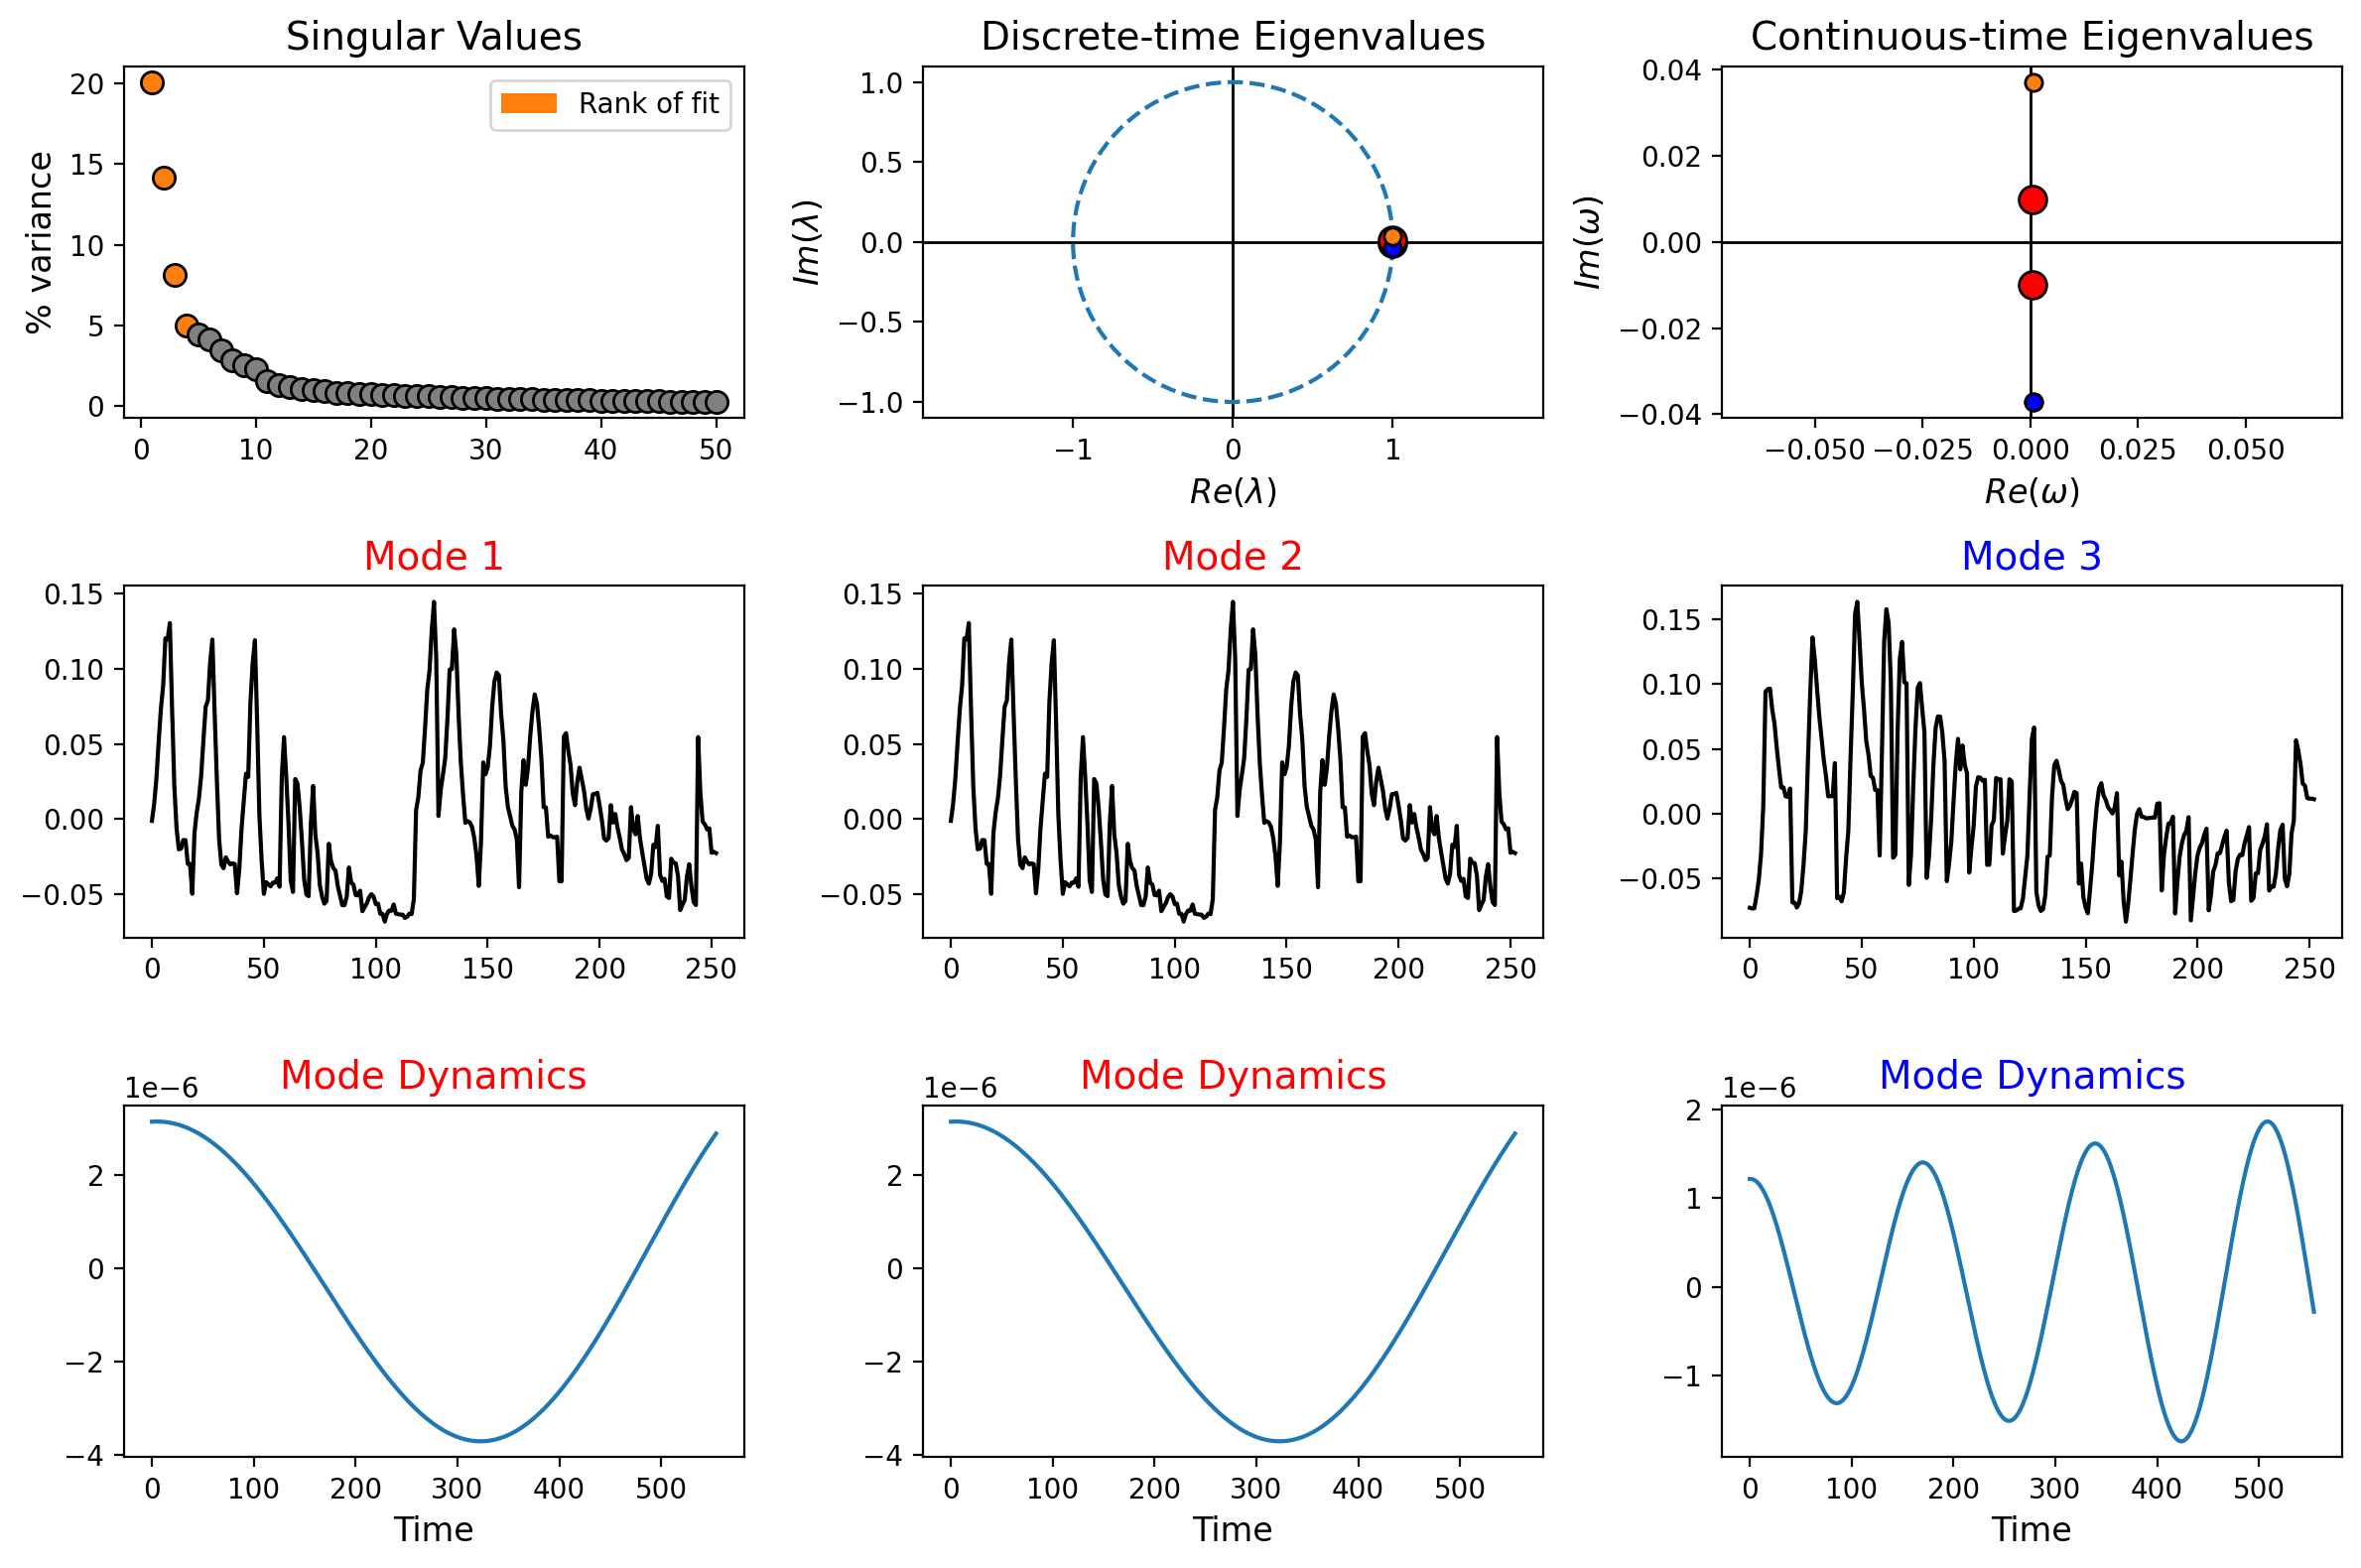

In [41]:
d = 1
t = np.linspace(0, 554, 554)
delay_t = t#[:-d +1]
opt_dmd = BOPDMD(svd_rank=4)
delay_optdmd = hankel_preprocessing(opt_dmd, d=d)
delay_optdmd.fit(avg_data, t=delay_t)
plot_summary(delay_optdmd, d=d)

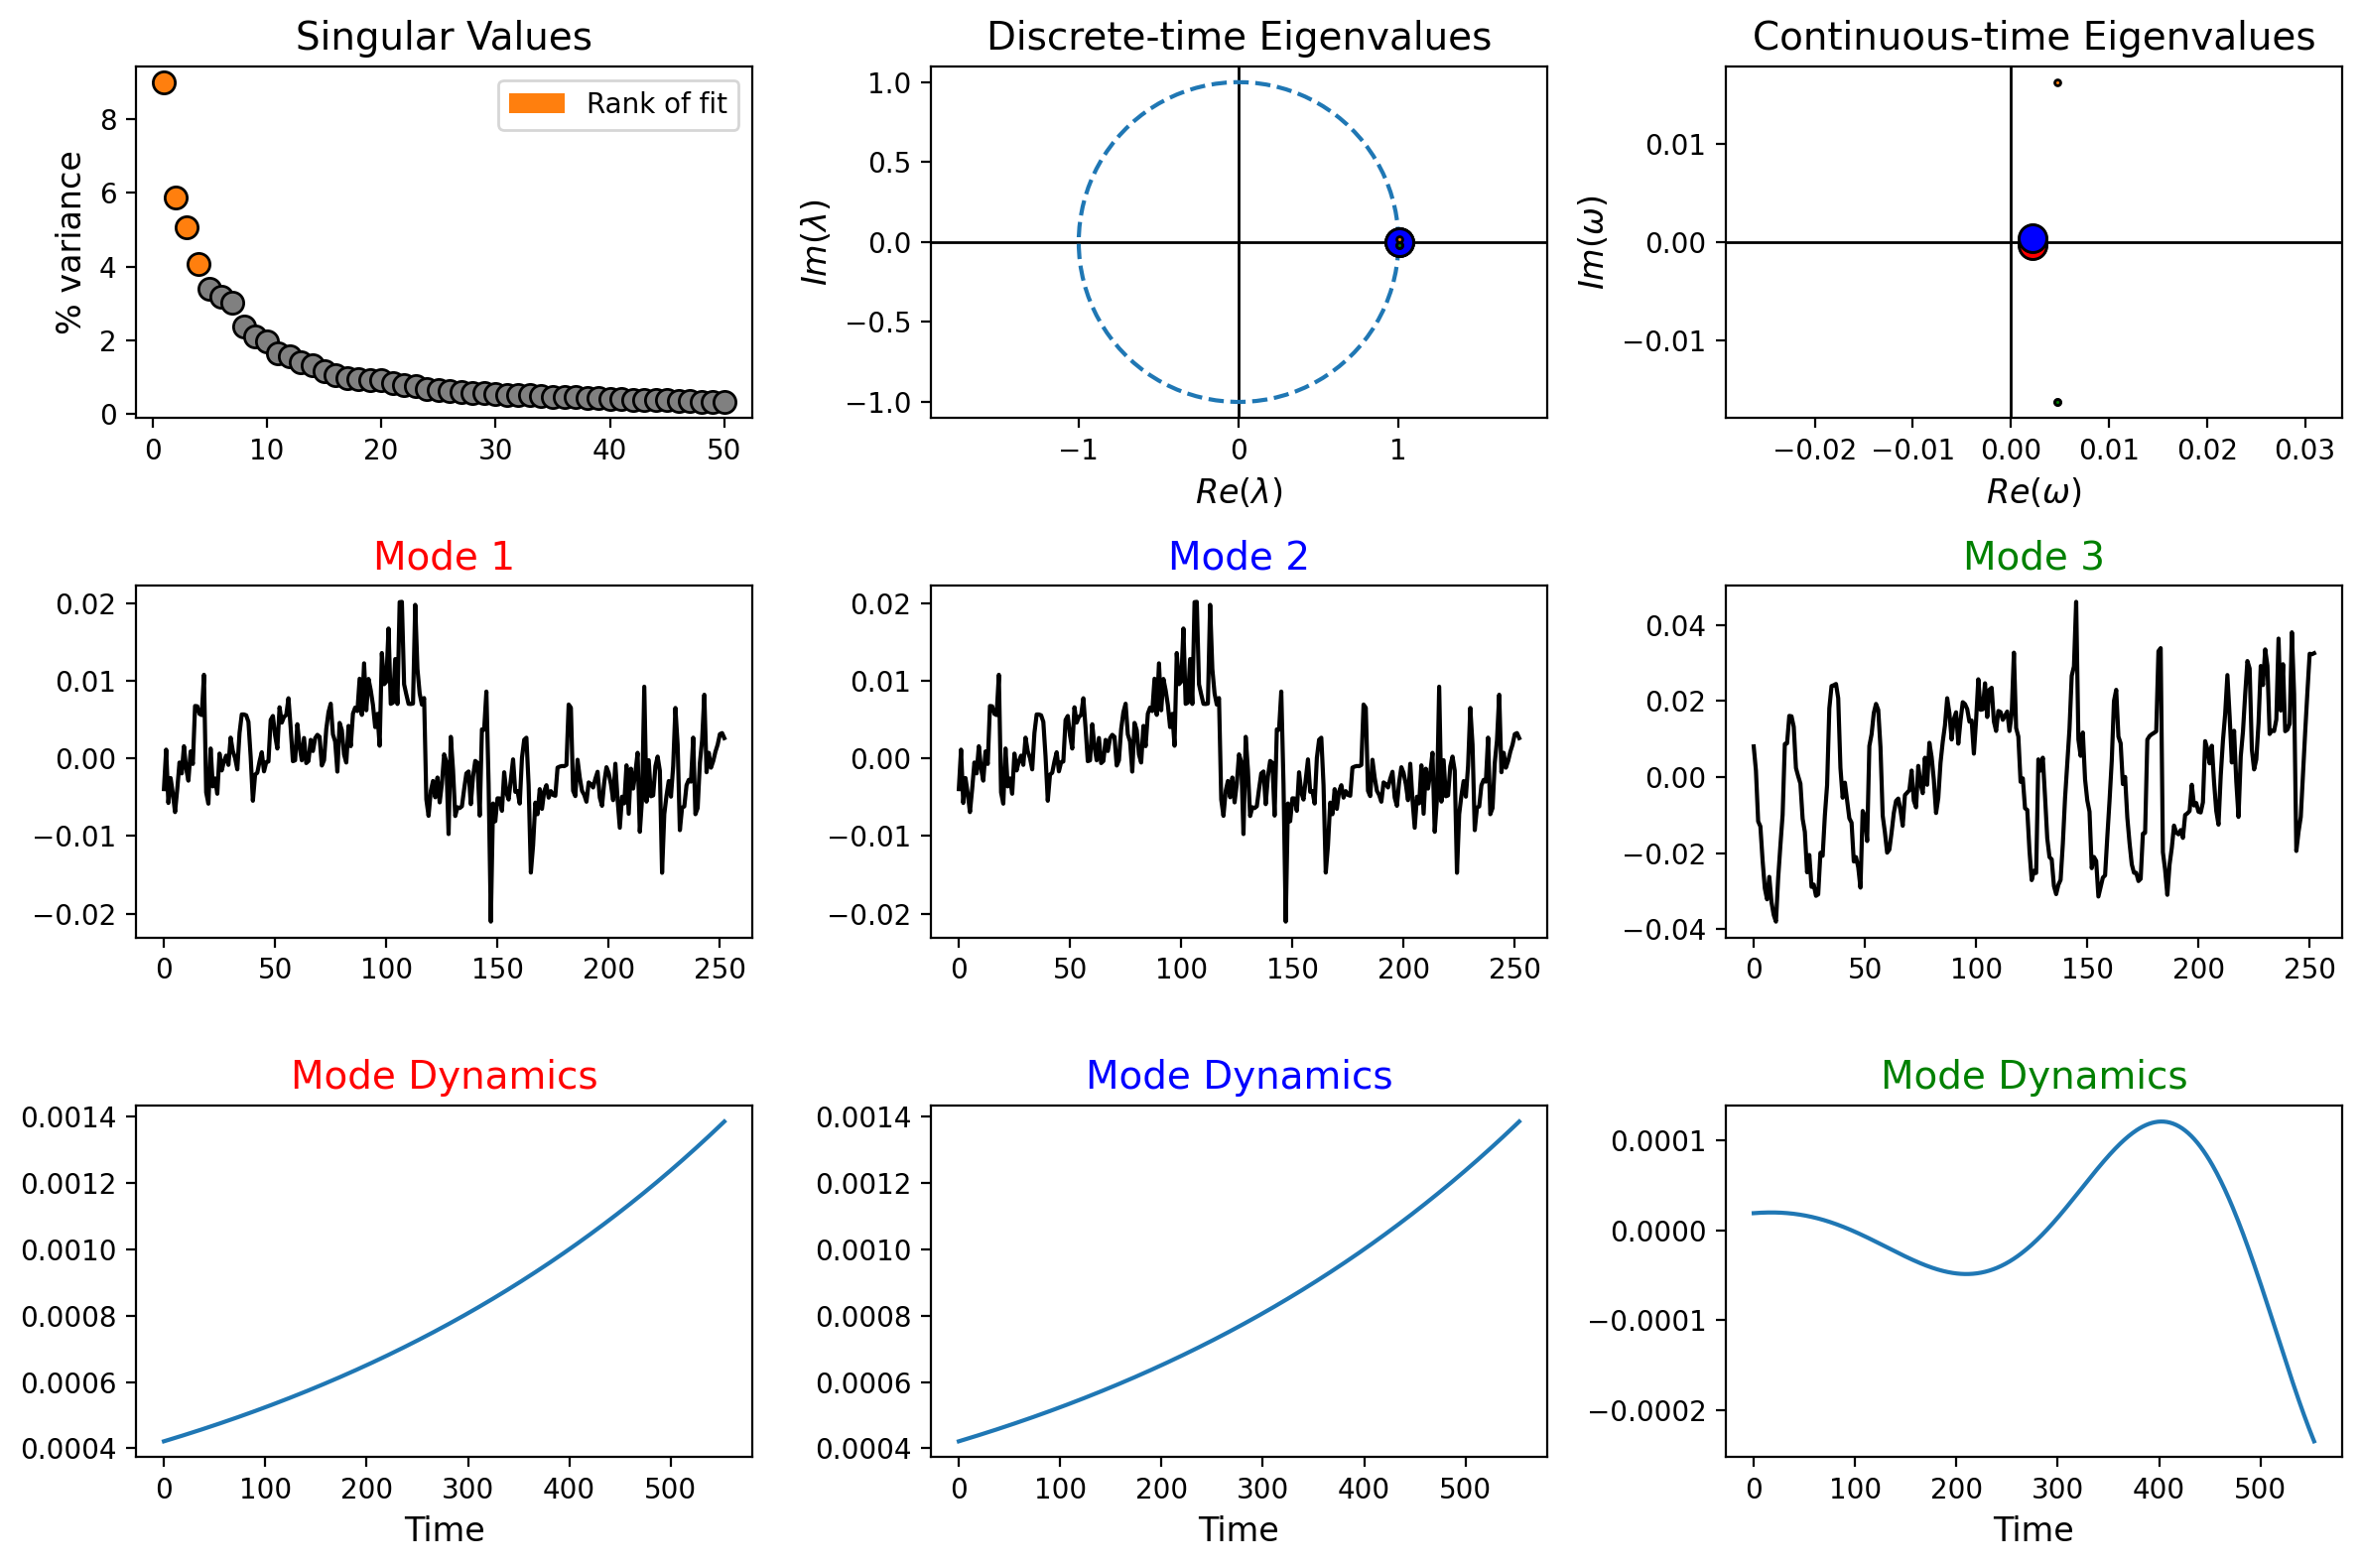

In [37]:
first_ep = data[0, :, :]
first_ep = np.reshape(first_ep, (data.shape[1], data.shape[2]))
d = 2 
t = np.linspace(0, 554, 554)
delay_t = t[:-d +1]
opt_dmd = BOPDMD(svd_rank=4)
delay_optdmd = hankel_preprocessing(opt_dmd, d=d)
delay_optdmd.fit(first_ep, t=delay_t)
plot_summary(delay_optdmd, d=d)
